<h1 style="color:#034e7d; font-size:50px; font-family:MV Boli; text-align:center;">Machine Learning and Statistics</h1>
<h1 style="color:#034e7d; font-size:50px; font-family:MV Boli; text-align:center;">Project</h1>

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;"> Classification Algorithms Applied to the Iris Flower Dataset</h1>

<a id="top"></a>

<h1 style="color:#595959; font-size:40px; font-family:MV Boli;">Table of Contents</h1>

 - [Introduction](#introduction)
     - [Information about the dataset](#introdata)
     - [Supervised Learning](#supervisedintro)
     - [Classification Algorithms](#classificationintro)
     - [Python Imports](#imports)
     - [Import the Data](#importdata)
     - [Data information](#datainfo)
     - [Check for missing Values](#checkmissing)
     - [Check for zeros in data](#checkzeros)
 - [Classifiers](#classifiers)
     - [Summary Statistics](#summarystats)
     - [K-Nearest neighbour](#knn)
         - [Training the Dataset with Mean Columns](#trainknn)
         - [Test the classifier with Already Seen Data](#alreadyseenknn)
         - [Check the Accuracy](#checkaccuracyknn)
         - [Split data into Train and Test, and Run Predictions Using Mean Columns](#splittraintestknn)
 - [Conclusion](#conclusion)
 - [Bibliography](#bibliography)

<a id="introduction"></a>

<h1 style="color:#035e96; font-size:40px; font-family:MV Boli; text-align:center;">Introduction</h1>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Information About the Dataset</h2>

[Back To Top](#top)

<a id="introdata"></a>

The dataset was obtained in 1936.

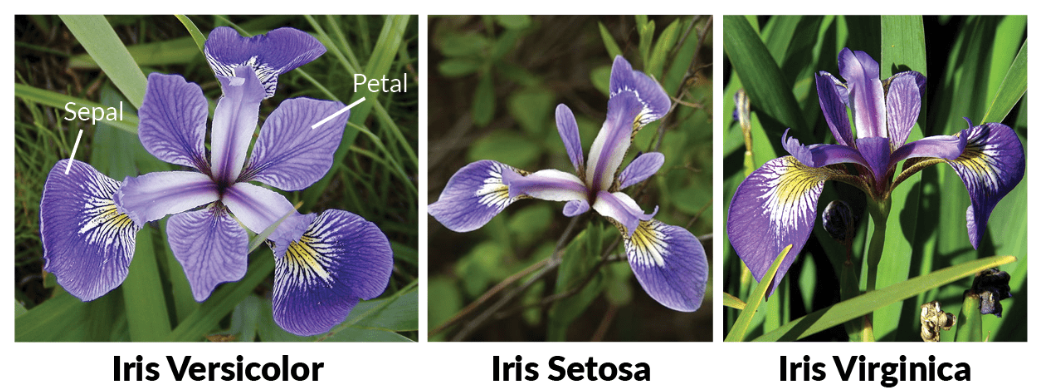

<center>Ref: Santos (2019)</center>

Fisher (1988) outlined the iris dataset as "one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other"
The dataset has information about 3 classes of Iris flow:
 - Setosa
 - Versicolor
 - Virignica

It has 150 rows (50 for each class) and 5 columns as follows:
 - sepal_length
 - sepal width
 - petal_length
 - petal_width
 - class

<a id="supervisedintro"></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Supervised Learning</h2>

[Back To Top](#top)

Supervised learning is a "subcategory of machine learning and artificial intelligence" (IBM, n.d.). It uses labelled datasets to train algorithms to classify data that is not labelled.
Cunningham et al (2008) states that "Supervised learning entails learning a mapping between a set of input variables X and an output variable Y and applying this mapping to predict the outputs for unseen data". They also go on to say that it is "the most important methodology in machine learning".
Suprvised learninng uses a training dataset that that includes the inputs along with their correct outputs. This teaches the algorithm how to classify the data based on the training data.
Supervised learning can be broken ointo2 categories as follows:
 - Regression: this is used to detrmine relationships betwenn dependant and independant variables. It is often used for making projections, such as in the are of sales.
 - Classification: as the name suggests, this classifies data into individual categories. We will be focusing on this type of spervised learning in this work.


<a id="classificationintro"></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Classification Algorithms</h2>

[Back To Top](#top)

Classification is " the process of recognizing, understanding, and grouping ideas and objects into preset categories or "sub-populations'." (Wolf, 2020)

In Machine learning training data is used to train algorithms to classify data into various categories. It uses pattern recognition from the training data to find the same patterns in subsequent data (Wolff, 2020).

In this research I will look at 5 machine learning classification algorithms:
 - K-Nearest Neighbour
 - Support Vector Classification
 - Logistic Regression Classification
 - Naïve Bayes classifier
 - Random Forest Classifier
 
I will use all of these to predict the Iris class and check the accuracy of them.

<font color='red'>(Possibly look at decision trees)</font>

<a id="imports"></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Python Imports</h2>

[Back To Top](#top)

In [1]:
import pandas as pd
import numpy as np
import sklearn.neighbors as nei

<a id='importdata'></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Import the Data</h2>

[Back To Top](#top)

In [2]:
# using data from Kaggle as it had the column headers already included.
# https://www.kaggle.com/datasets/uciml/iris/

#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df = pd.read_csv("data/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<a id='datainfo'></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Data Information</h2>

[Back To Top](#top)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.agg(['min', 'max'])

,sepal_length,sepal_width,petal_length,petal_width,class
min,4.3,2.0,1.0,0.1,setosa
max,7.9,4.4,6.9,2.5,virginica


<a id="checkmissing"></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Check for Missing Values</h2>

[Back To Top](#top)

In [5]:
num_missing = df.isnull().sum()
num_missing

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

<a id='checkzeros'></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Check for Zeros</h2>

[Back To Top](#top)

Checking for any zeros in the data and removing the applicable rows as the data is possibly corrupted or invalid. There are 13 rows with zeros.

In [6]:
for column in df:
    print(column + ": " + str((df[column] == 0).sum()) )

sepal_length: 0
sepal_width: 0
petal_length: 0
petal_width: 0
class: 0


<a id="classifiers"></a>

<h1 style="color:#035e96; font-size:40px; font-family:MV Boli; text-align:center;">Classifiers</h1>

[Back To Top](#top)

<a id="summarystats"></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Summary Statistics</h2>

[Back To Top](#top)

In most instances of data analytics, a good starting point in the analysis is to check for missing and null values. This is part of the data cleansing stage of data analytics. Very often the next step is to get a description of the data. This often means getting a list of columns and their data types as well as the statistical summary of the actual values. The following 8 statistics for the values in each column were generated:
1. Count
2. Mean
3. Standard Deviation
4. The minimum value
5. The first quartile
6. The second quartile
7. The third quartile
8. The maximum value

These high-level figures give an idea of the spread of the data for each Iris characteristic.

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Get the statistics specifially for the setosa Iris
df_setosa = df.loc[df['class'] == "setosa"]
df_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [9]:
# Get the statistics specifially for the versicolor Iris
df_versicolor = df.loc[df['class'] == "versicolor"]
df_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [10]:
# Get the statistics specifially for the virginica Iris
df_virginica = df.loc[df['class'] == "virginica"]
df_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


<a id='knn'></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">K-Nearest Neighbor</h2>

[Back To Top](#top)

One of the commonly used classifiers is the K-nearest Neighbour (KNN). Kapur (2020) carried out the k-NN on the Iris Dataset to reach a conclusion that it is approximately 97% accurate in predicting the class of the Iris flower.

KNN works by getting the distance of the queried sample from the samples in the data. By default, it selects 5 (K) of the closest samples and then votes for the most frequent label/classification. The number of samples (K) used can be decided by the user.

In my classification (below) I have used all the values to classify the flowers as either setosa, versicolor or verginica. I had ran the prediction one-hundred times and got the same accuracy each time it ran. Because it did not change the outcome I removed it from the final analysis.

In [11]:
# Split the dataframe into a dataframe for inputs and a dataframe for outputs.

inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['class']

In [12]:
# Set up the KNN object and get the fit from the datasets

knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs, outputs)

# Put this here as jupyter notebook tries to prints the status of the knn.fit
# This works fine locally but on github it gives an error when trying to display it
# Printing a blank line, prevents the status from being printed and avoids the error.
# This is a well documented bug in online forums.
print()

<a id='alreadyseenknn'></a>

<h4 style="color:#737373; font-size:20px; font-family:MV Boli; text-align:center;">Test the classifier with Already Seen Data</h4>

[Back To Top](#top)

In [13]:
# Getting the first row of inputs so I can run the predict with it and see if I get
# the correct prediction.
inputs.loc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [14]:
# This is the correct prediction.

outputs.loc[0]

'setosa'

In [15]:
# This is what the KNN predicts (uing the above data).

knn.predict([[5.1, 3.5, 1.4, 0.2]])

c:\Users\elaine.tynan\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [16]:
# You can do multiple predictions a the same time (both of these are the same).
knn.predict([[5.1, 3.5, 1.4, 0.2],
             [5.1, 3.5, 1.4, 0.2]])

c:\Users\elaine.tynan\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa'], dtype=object)

<a id='checkaccuracyknn'></a>

<h4 style="color:#737373; font-size:20px; font-family:MV Boli; text-align:center;">Check the Accuracy</h4>

[Back To Top](#top)

In [17]:
def checkAccuracy(predicted_diagnosis):
    i = 0
    incorrect = 0
    setosa_count= 0 # count of setosa class (should be 50)
    setosa_count_predict = 0 # count of predicted setosa class incorrect
    versicolor_count = 0 # count of versicolor class (should be 50)
    versicolor_count_predict = 0 # count of predicted versicolor class incorrect
    virginica_count = 0 # count of virginica class (should be 50)
    virginica_count_predict = 0 # count of predicted virginica class incorrect
    for x in predicted_diagnosis:
        if outputs[i] == "setosa":
            setosa_count += 1
        elif outputs[i] == "versicolor":
            versicolor_count += 1
        else:
            virginica_count += 1
        
        if x != outputs[i]:
            print(f"Class at index {i} is predicted to be {x} but is {outputs[i]}")
            incorrect += 1
            if outputs[i] == "setosa":
                setosa_count_predict += 1
            elif outputs[i] == "versicolor":
                versicolor_count_predict += 1
            else:
                virginica_count_predict += 1
        i += 1
    
    return [setosa_count_predict, versicolor_count_predict, virginica_count_predict]
    

In [18]:
# Check the accuracy

incorrect_list = []
predicted_diagnosis = knn.predict(inputs)
for i in range(100):
    incorrect_list.append(checkAccuracy(predicted_diagnosis))
incorrect_list

Class at index 70 is predicted to be virginica but is versicolor
Class at index 72 is predicted to be virginica but is versicolor
Class at index 83 is predicted to be virginica but is versicolor
Class at index 106 is predicted to be versicolor but is virginica
Class at index 119 is predicted to be versicolor but is virginica
Class at index 70 is predicted to be virginica but is versicolor
Class at index 72 is predicted to be virginica but is versicolor
Class at index 83 is predicted to be virginica but is versicolor
Class at index 106 is predicted to be versicolor but is virginica
Class at index 119 is predicted to be versicolor but is virginica
Class at index 70 is predicted to be virginica but is versicolor
Class at index 72 is predicted to be virginica but is versicolor
Class at index 83 is predicted to be virginica but is versicolor
Class at index 106 is predicted to be versicolor but is virginica
Class at index 119 is predicted to be versicolor but is virginica
Class at index 70 i

[[0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0, 3, 2],
 [0,

###This is code i had in but removed to run the KNN 100 times. I will be putting it back in so i have saved it in a markdown cell temporarily

print(f"There are {incorrect} incorrect classes")
    print(f"That is {round(incorrect/150*100)}% incorrect\n")

    print(f"There are {setosa_count_predict} incorrect predictions for setosa")
    print(f"There are {setosa_count} in the setosa class")
    print(f"That is {round(setosa_count_predict/setosa_count*100)}% incorrect") # 50 rows for each class
    print(f"Setosa accuracy is {100 - round(setosa_count_predict/setosa_count*100)}%\n")

    print(f"There are {versicolor_count_predict} incorrect predictions for versicolor")
    print(f"There are {versicolor_count} in the versicolor class")
    print(f"That is {round(versicolor_count_predict/versicolor_count*100)}% incorrect") # 50 rows for each class
    print(f"Versicolor accuracy is {100 - round(versicolor_count_predict/versicolor_count*100)}%\n")

    print(f"There are {virginica_count_predict} incorrect predictions for virginica")
    print(f"There are {virginica_count} in the virginica class")
    print(f"That is {round(virginica_count_predict/virginica_count*100)}% incorrect") # 50 rows for each class
    print(f"Virginica accuracy is {100 - round(virginica_count_predict/virginica_count*100)}%\n")

<a id='classification'></a>

<h2 style="color:#826b5d; font-size:30px; font-family:MV Boli; text-align:center;">Sample Classification</h2>

[Back To Top](#top)


<a id="conclusion"></a>

<h1 style="color:#035e96; font-size:40px; font-family:MV Boli; text-align:center;">Conclusion</h1>

[Back To Top](#top)

in this notebook we have reviewed literature in relation to the iris Dataset. We looked at the structure and content of the data.

<a id="bibliography"></a>

<h1 style="color:#035e96; font-size:40px; font-family:MV Boli; text-align:center;">Bibliography</h1>

[Back To Top](#top)

Cunningham, P., Cord, M., Delany, S.J. (2008). Supervised Learning. <em>In: Cord, M., Cunningham, P. (eds) Machine Learning Techniques for Multimedia</em>. Cognitive Technologies. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-540-75171-7_2 (Accessed 19 November 2023)

Fisher, R. A., (1988). 'Iris. UCI Machine Learning Repository'. https://doi.org/10.24432/C56C76. (Accessed 19 November 2023)

IBM, (n.d.) 'What is Supervised Learning?' Available at: https://www.ibm.com/topics/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as,data%20or%20predict%20outcomes%20accurately. (Accessed 19 November 2023)

Kapur. I., (2020). 'k-NN on Iris Dataset'. Available at: https://towardsdatascience.com/k-nn-on-iris-dataset-3b827f2591e (Accessed 22 November 2023)

Santos, R., (2019). 'Data Science Example - Iris dataset'. Available at: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html (Accessed 19 November 2023)

Wolff. R., (2020). '5 Types of Classification Algorithms in Machine Learning'. Available at: https://monkeylearn.com/blog/classification-algorithms/ (Accessed 20 November 2023)

Yuanyuan Wu, Jing He, Yimu Ji, Guangli Huang, Haichang Yao, Peng Zhang, Wen Xu, Mengjiao Guo, Youtao Li, (2019) 'Enhanced Classification Models for Iris Dataset', <em>Procedia Computer Science</em>. Available at: https://www.sciencedirect.com/science/article/pii/S1877050919320836 (Accessed 19 November 2023)